## 컨볼루션 신경망(Convolutional Neural Network, CNN)
- 실습 예제 : Cats_Dogs   
https://www.kaggle.com/competitions/dogs-vs-cats/data   
train.zip 다운로드
- 추천 도서   
https://thebook.io/080315/   
케라스 창시자에게 배우는 딥러닝 개정 2판

In [1]:
import os, shutil
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
original_dataset_dir='./train'

base_dir = './data/cats_and_dogs'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

In [5]:
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [6]:
# test set과 train set 나누기

fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 10000
훈련용 강아지 이미지 전체 개수: 10000
테스트용 고양이 이미지 전체 개수: 2500
테스트용 강아지 이미지 전체 개수: 2500


In [11]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))  # input_shape; jpg마다 가로세로 픽셀크기가 다름
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())  # Dense에 넣기 위해
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

* Conv2D 32
input 3 (150 150)   
weight 9 (3 3)   
bias 32 (1 32)   
output 32 (148 148)   
param 896 =  (3*9*32) + (1*32)   
***
* MaxPooling2D   
input 32 (148 148)   
output 32 (74 74)   
***
* Conv2D 64   
input 32 (74 74)   
weight 9 (3 3)   
bias 64 (1 64)   
output 64 (72 72)   
param 18496 =  (32*9*64) + (1*64)   
***
* MaxPooling2D   
input 64 (72 72)   
output 64 (36 36)   
***
* Conv2D 128   
input 64 (36 36)   
weight 9 (3 3)    
bias 128 (1 128)   
output 128 (34 34)   
param 73856 =  (64*9*128) + (1*128)    
***
* MaxPooling2D   
input 128 (34 34)   
output 128 (17 17)   
***
* Conv2D 128   
input 128 (17 17)   
weight 9 (3 3)    
bias 128 (1 128)   
output 128 (15 15)   
param 147584 =  (128*9*128) + (1*128)   
***
* MaxPooling2D   
input 128 (15 15)   
output 128 (7 7)   
***
* Flatten   
input 128 (7 7)   
output 6272 = (7*7*128)   
***
* Dense 512   
input 6272   
weight 512 (6272 512)    
bias 512 (1 512)   
output 512   
param 3211776 =  (6272*512) + (1*512)   
***
* Dense 1   
input 512   
weight 1 (512 1)    
bias 1 (1 1)   
output 1   
param 513 =  (512*1) + (1*1)   

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # 입력 feature를 0~1로 맞추기 위해, 소수 출력을 위해 1. 실수로 표기
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 학습용 데이터 위치 지정
    target_size=(150, 150),  # target 내의 jpg 크기 지정
    batch_size=20,
    class_mode='binary'  # 2개 클래스니까 cats, dogs, target[0]=cats, target[1]=dogs 알아서 레이블링 
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary' 
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator
)

Epoch 1/30
1000/1000 [==============================] - 275s 274ms/step - loss: 0.6678 - accuracy: 0.5807 - val_loss: 0.5930 - val_accuracy: 0.6796
Epoch 2/30
1000/1000 [==============================] - 217s 217ms/step - loss: 0.5377 - accuracy: 0.7320 - val_loss: 0.4602 - val_accuracy: 0.7798
Epoch 3/30
1000/1000 [==============================] - 218s 218ms/step - loss: 0.4345 - accuracy: 0.7998 - val_loss: 0.4000 - val_accuracy: 0.8178
Epoch 4/30
1000/1000 [==============================] - 217s 217ms/step - loss: 0.3701 - accuracy: 0.8365 - val_loss: 0.3494 - val_accuracy: 0.8462
Epoch 5/30
1000/1000 [==============================] - 217s 217ms/step - loss: 0.3258 - accuracy: 0.8592 - val_loss: 0.3105 - val_accuracy: 0.8652
Epoch 6/30
1000/1000 [==============================] - 216s 216ms/step - loss: 0.2847 - accuracy: 0.8791 - val_loss: 0.3590 - val_accuracy: 0.8406
Epoch 7/30
1000/1000 [==============================] - 217s 217ms/step - loss: 0.2555 - accuracy: 0.8924 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



32개의 결과를 얻기 위해 1장의 커널을 사용하지 않고 32장의 커널을 사용하는 이유는,   
각 층의 여러 개 kernal을 두면 세밀해지기 때문이다.     
그러나 kernel의 수와 세밀함은 비례하지 않다.

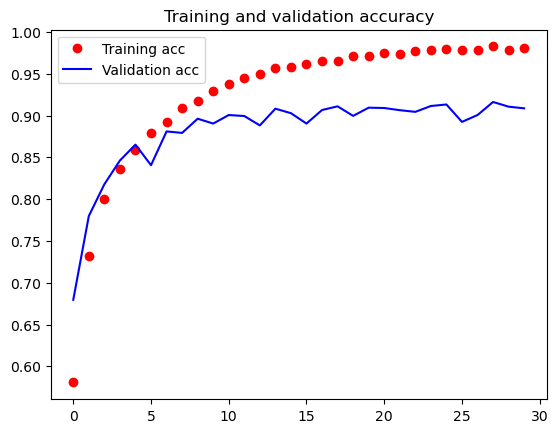

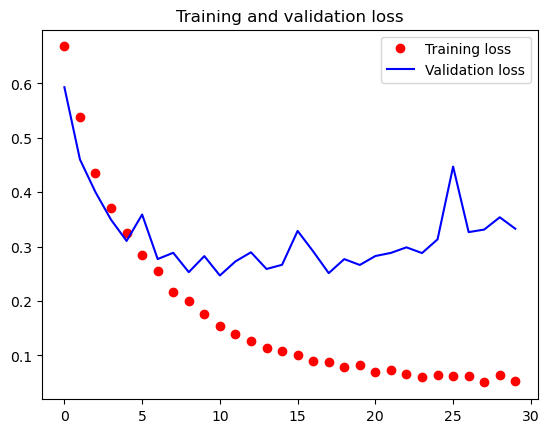

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()